1. Understanding Bootstrap
    - (copied image with mean, median, variance, skew, kurtosis, IQR, Box plots at the bottom of image)
    - Notes: Monte-Carlo simulation
    - Why does bootstrapping work?
        * Pythonic Tip: Univariate bootstrap confidence interval (box plots)
2. Bootstrap regression
    - (Illustrate with linear regression sample, with scatter plot as samples)
        * Text: simulating a situation in which you did not collect the sample at some data points
    - Confidence interval of bootstrap regression -> P10 and P90 lines
        * Image: 1 sample (no uncertainty), 10 sample, 100 sample, 1000 sample
        * For 100 sample image, get the vertical columns for two data points, and show P10 and P90 at the specified x value.
        * Connect the P10 and P90 points
    - Linear, non-linear, multi-linear regressions
        * Notes: robust regression
        * Pythonic Tip: Bootstrap regression + reporting
3. Assumptions and limitations
    - (copy most of the explanations in the original bootstrap post)
4. Bootstrap in machine learning: Bagging
    * https://www.quora.com/What-is-the-difference-between-bagging-and-bootstrapping-in-ML-statistics
    

unconv_MV_v5.csv

> **Bootstrapping** is a statistical method for estimating the <a href="#dist_stats">sampling distribution of a statistic</a> by sampling with replacement from the original sample, most often with the purpose of estimating confidence intervals of a population parameter like a mean, median, proportion, correlation coefficient or regression coefficient.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn import feature_selection

In [4]:
file = 'sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

df.head()

Well    Por  Perm    AI  Brittle   TOC    VR         Prod
0     1  12.08  2.92  2.80    81.40  1.16  2.31  4165.196191
1     2  12.38  3.53  3.22    46.17  0.89  1.88  3561.146205
2     3  14.02  2.59  4.01    72.80  0.89  2.72  4284.348574
3     4  17.67  6.75  2.63    39.81  1.08  1.88  5098.680869
4     5  17.52  4.57  3.18    10.94  1.51  1.90  3406.132832

In [5]:
df['synergy'] = df['Por'].values * df['Perm'].values

In [6]:
features = features[['Por', 'Perm', 'synergy']]
X = features.values.reshape(-1, 8)
target = df['Prod']

import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

NameError: name 'features' is not defined

In [7]:
ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features)

NameError: name 'linear_model' is not defined

In [8]:
model.score(features, target)

NameError: name 'model' is not defined

In [9]:
features = features[['Por', 'Perm']]
X = features.values.reshape(-1, 8)
target = df['Prod']

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features)

model.score(features, target)

NameError: name 'features' is not defined

In [10]:
orig_fit = feature_selection.f_regression(X, target)
orig_df = pd.DataFrame([orig_fit[0], orig_fit[1]], columns=features.columns, index=['Coeff', 'p-val']).T
orig_df['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
orig_df.round(3)

NameError: name 'X' is not defined

In [11]:
pca = PCA(n_components=6)
new = pca.fit_transform(X) 

pca_fit = feature_selection.f_regression(new, target)
pca_df = pd.DataFrame([pca_fit[0], pca_fit[1]], columns=features.columns, index=['Coeff', 'p-val']).T
pca_df['VIF'] = [variance_inflation_factor(new, i) for i in range(new.shape[1])]
pca_df.round(3)

NameError: name 'X' is not defined

In [12]:
df.describe().round(3)

Well      Por     Perm       AI  Brittle      TOC       VR  \
count  200.000  200.000  200.000  200.000  200.000  200.000  200.000   
mean   100.500   14.991    4.331    2.969   48.162    0.990    1.964   
std     57.879    2.971    1.731    0.567   14.129    0.482    0.301   
min      1.000    6.550    1.130    1.280   10.940   -0.190    0.930   
25%     50.750   12.912    3.122    2.548   37.755    0.617    1.770   
50%    100.500   15.070    4.035    2.955   49.510    1.030    1.960   
75%    150.250   17.402    5.288    3.345   58.262    1.350    2.142   
max    200.000   23.550    9.870    4.630   84.330    2.180    2.870   

           Prod  synergy  
count   200.000  200.000  
mean   4311.220   68.815  
std     992.038   38.288  
min    2107.139    7.401  
25%    3618.065   41.915  
50%    4284.687   61.611  
75%    5086.090   86.154  
max    6662.622  194.288

R^2 = 0.933


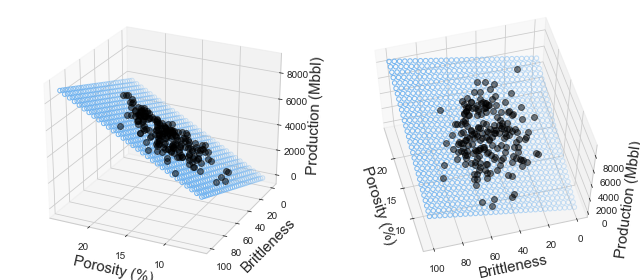

In [3]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

file = 'sample_data/unconv_MV_v5.csv'

df = pd.read_csv(file)

features = df[['Por', 'Brittle']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0, 100, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features_new)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

ax1.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax2.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


for ax in axes:

    ax.set_xlabel('Porosity (%)', fontsize=15)
    ax.set_ylabel('Brittleness', fontsize=15)
    ax.set_zlabel('Production (Mbbl)', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=116)    
ax2.view_init(elev=60, azim=165)

fig.tight_layout()

print('R^2 = %.3f' % model.score(features, target))

R^2 = 0.755


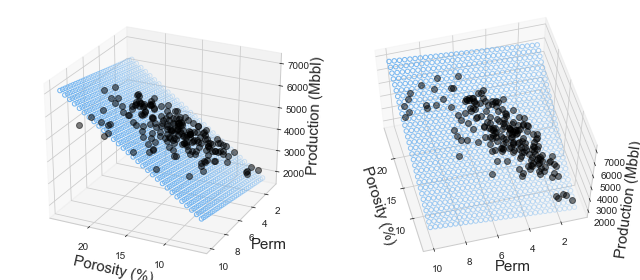

In [14]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

file = 'sample_data/unconv_MV_v5.csv'

df = pd.read_csv(file)

features = df[['Por', 'Perm']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(1, 10, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features_new)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

ax1.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax2.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


for ax in axes:

    ax.set_xlabel('Porosity (%)', fontsize=15)
    ax.set_ylabel('Perm', fontsize=15)
    ax.set_zlabel('Production (Mbbl)', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=116)    
ax2.view_init(elev=60, azim=165)

fig.tight_layout()

print('R^2 = %.3f' % model.score(features, target))

<IPython.core.display.Javascript object>


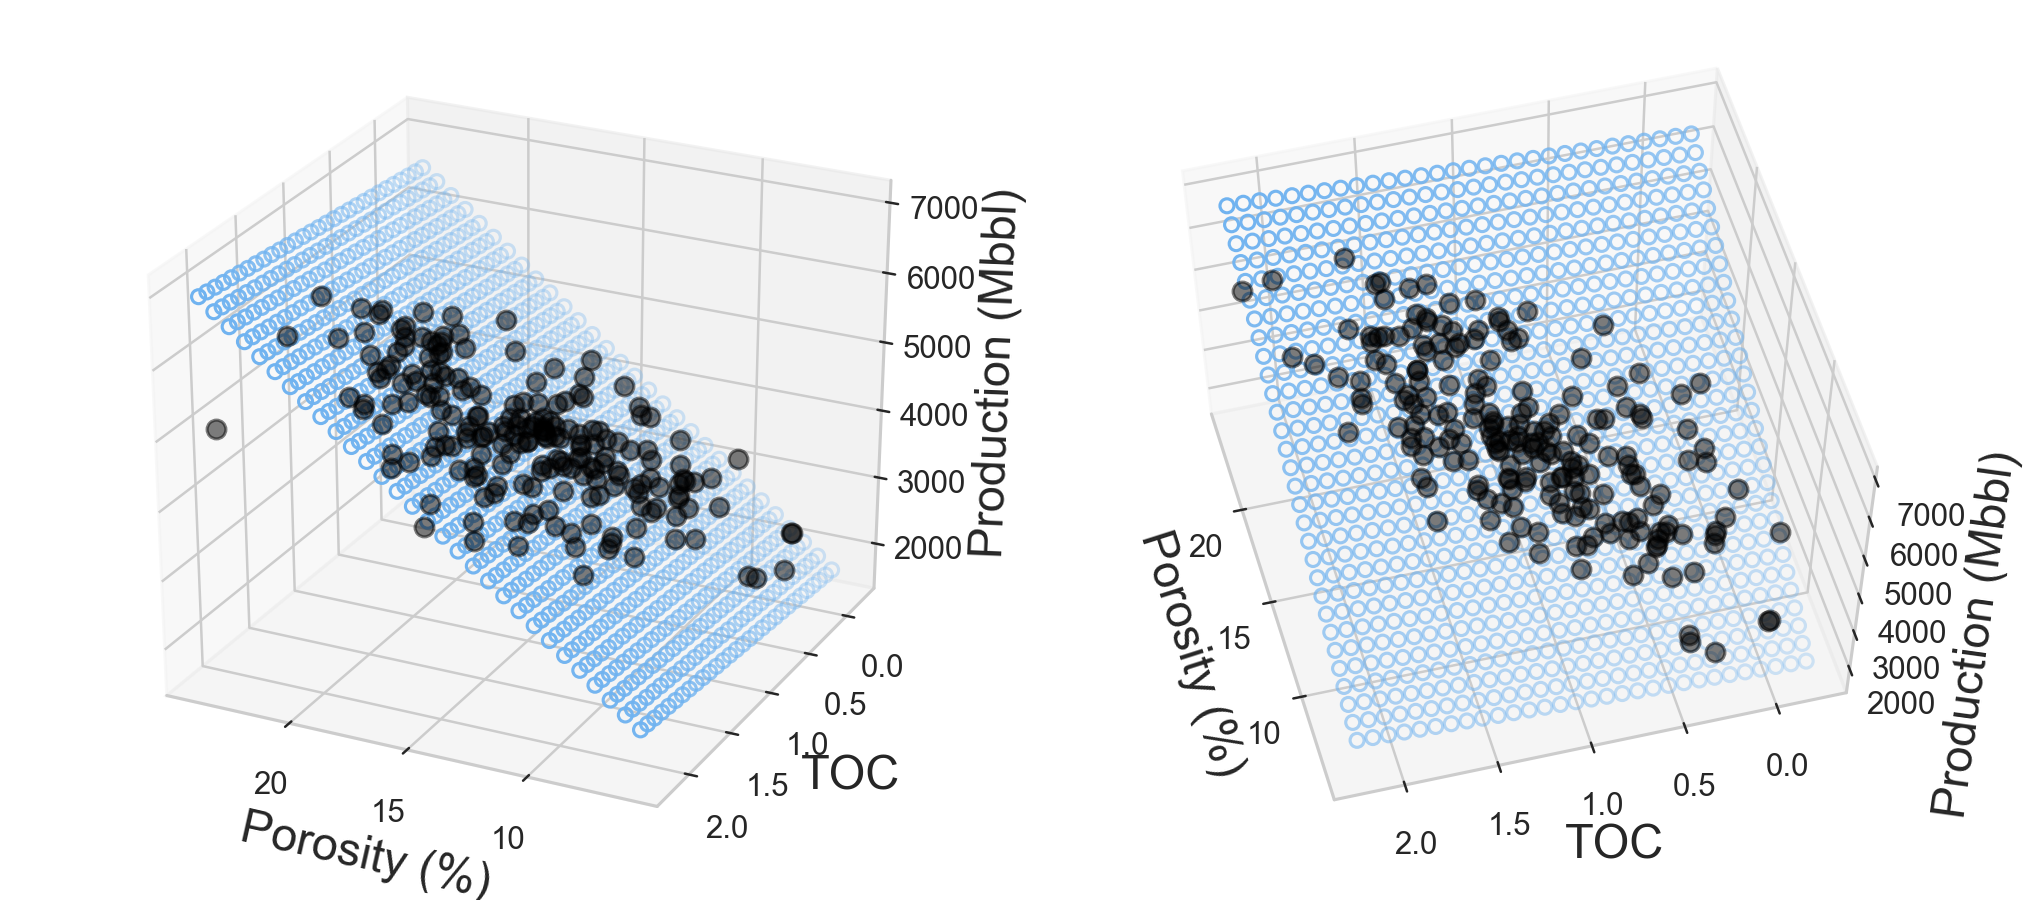

R^2 = 0.746


In [27]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

file = 'sample_data/unconv_MV_v5.csv'

df = pd.read_csv(file)

features = df[['Por', 'TOC']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(-0.2, 2.2, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features_new)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

ax1.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax2.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


for ax in axes:

    ax.set_xlabel('Porosity (%)', fontsize=15)
    ax.set_ylabel('TOC', fontsize=15)
    ax.set_zlabel('Production (Mbbl)', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=116)    
ax2.view_init(elev=60, azim=165)

fig.tight_layout()

print('R^2 = %.3f' % model.score(features, target))

<IPython.core.display.Javascript object>


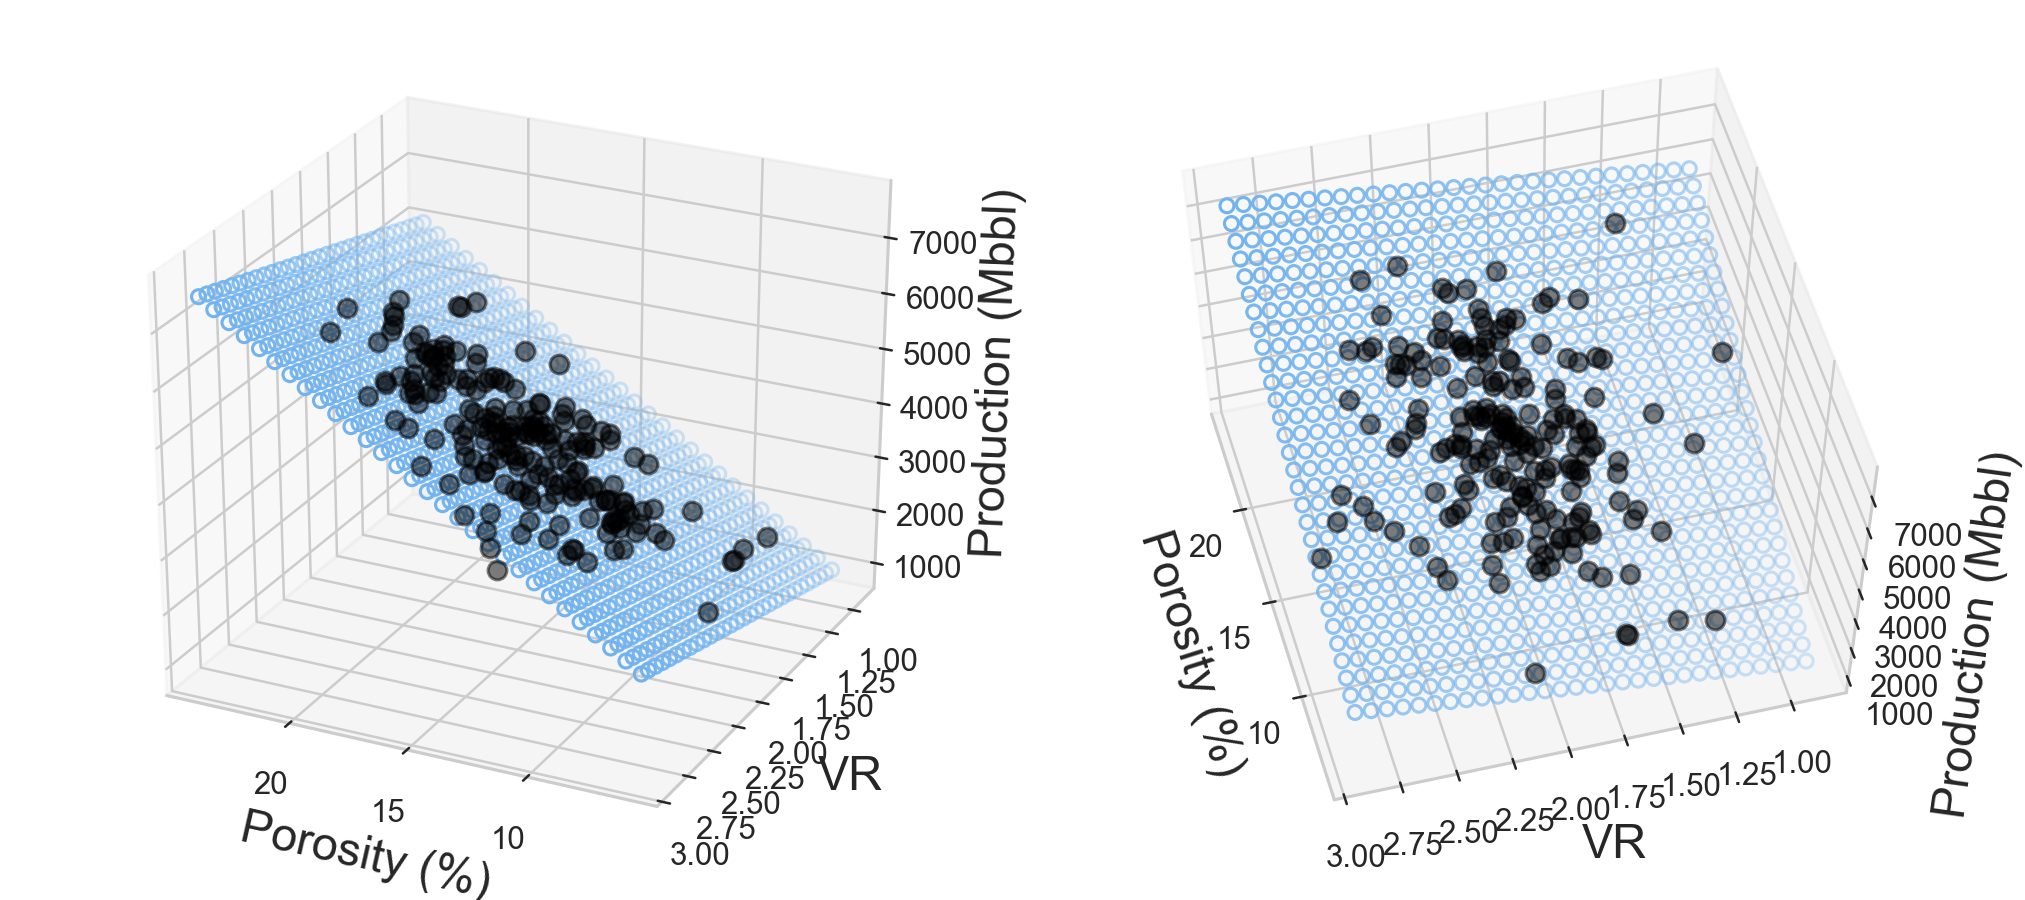

R^2 = 0.795


In [28]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

file = 'sample_data/unconv_MV_v5.csv'

df = pd.read_csv(file)

features = df[['Por', 'VR']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0.9, 2.9, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features_new)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

ax1.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax2.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


for ax in axes:

    ax.set_xlabel('Porosity (%)', fontsize=15)
    ax.set_ylabel('VR', fontsize=15)
    ax.set_zlabel('Production (Mbbl)', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=116)    
ax2.view_init(elev=60, azim=165)

fig.tight_layout()

print('R^2 = %.3f' % model.score(features, target))

<IPython.core.display.Javascript object>


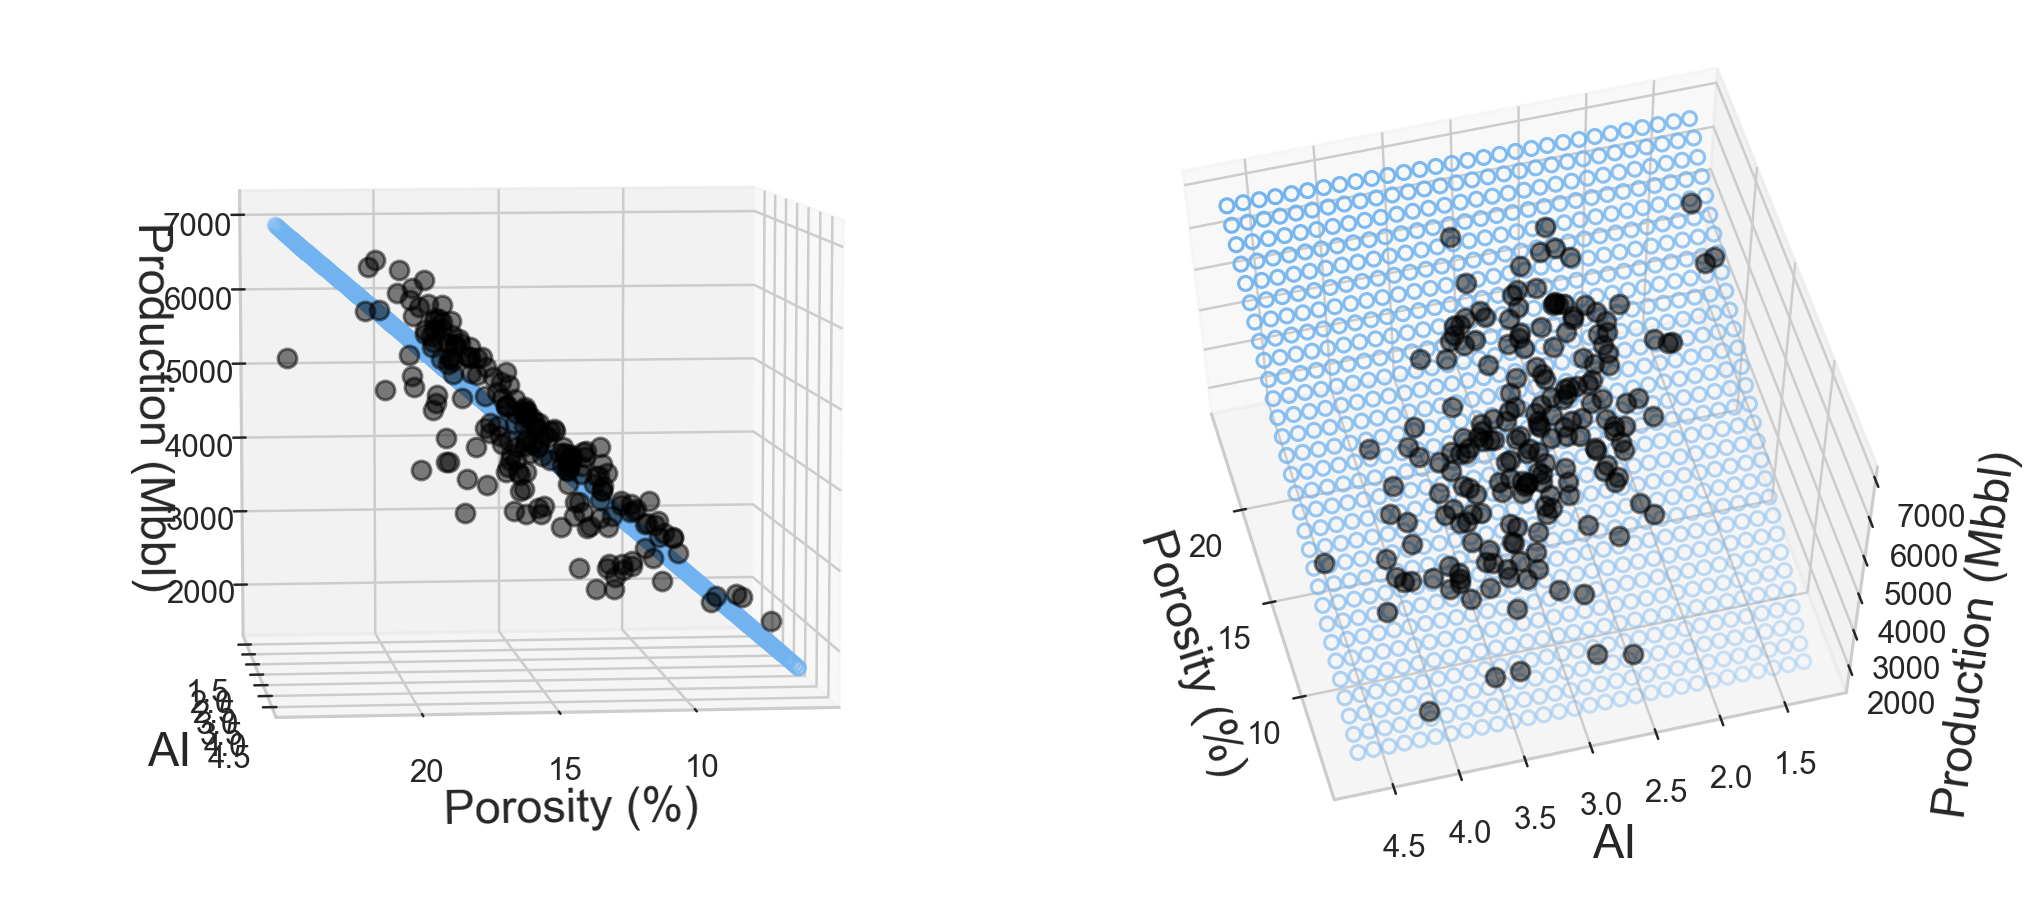

R^2 = 0.743


In [29]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

file = 'sample_data/unconv_MV_v5.csv'

df = pd.read_csv(file)

features = df[['Por', 'AI']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(1.3, 4.7, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(features, target)
predicted = model.predict(features_new)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

ax1.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax2.plot(x, y, z, color='k', zorder=2, linestyle='none', marker='o', alpha=0.5)
ax2.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
           facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


for ax in axes:

    ax.set_xlabel('Porosity (%)', fontsize=15)
    ax.set_ylabel('AI', fontsize=15)
    ax.set_zlabel('Production (Mbbl)', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=116)    
ax2.view_init(elev=60, azim=165)

fig.tight_layout()

print('R^2 = %.3f' % model.score(features, target))

In [14]:
# Code modified from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import warnings                           # silence warnings that commonly occur with random forest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new = scaler.fit_transform(df)
df_new = pd.DataFrame(new)

warnings.filterwarnings('ignore')     

x = df_new.iloc[:,[1,2,3,4,5,6]]              # separate DataFrames for predictor and response features
y = df_new.iloc[:,[7]]

lab_enc = preprocessing.LabelEncoder(); 
y_encoded = lab_enc.fit_transform(y) # this removes an encoding error 

random_forest = RandomForestRegressor()   # instantiate the random forest  
random_forest = random_forest.fit(x, np.ravel(y_encoded)) # fit the random forest
importances = random_forest.feature_importances_

In [15]:
import pandas as pd
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = x.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

In [16]:
feature_importances

importance
1    0.767041
4    0.187225
5    0.014392
3    0.014166
2    0.009327
6    0.007849

In [19]:
df['Temp'] = df['Por'].values * 2

In [20]:
df.head()

Well    Por  Perm    AI  Brittle   TOC    VR         Prod   Temp
0     1  12.08  2.92  2.80    81.40  1.16  2.31  4165.196191  24.16
1     2  12.38  3.53  3.22    46.17  0.89  1.88  3561.146205  24.76
2     3  14.02  2.59  4.01    72.80  0.89  2.72  4284.348574  28.04
3     4  17.67  6.75  2.63    39.81  1.08  1.88  5098.680869  35.34
4     5  17.52  4.57  3.18    10.94  1.51  1.90  3406.132832  35.04

In [21]:
# Code modified from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import warnings                           # silence warnings that commonly occur with random forest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new = scaler.fit_transform(df)
df_new = pd.DataFrame(new)

warnings.filterwarnings('ignore')     

x = df.iloc[:,[1,2,3,4,5,6, 8]]              # separate DataFrames for predictor and response features
y = df.iloc[:,[7]]

lab_enc = preprocessing.LabelEncoder(); 
y_encoded = lab_enc.fit_transform(y) # this removes an encoding error 

random_forest = RandomForestRegressor()   # instantiate the random forest  
random_forest = random_forest.fit(x, np.ravel(y_encoded)) # fit the random forest
importances = random_forest.feature_importances_

In [22]:
import pandas as pd
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = x.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

In [17]:
feature_importances

importance
Por        0.789001
Brittle    0.166600
TOC        0.014175
VR         0.011012
AI         0.010706
Perm       0.008505

In [23]:
feature_importances

importance
Por        0.487029
Temp       0.315590
Brittle    0.170310
TOC        0.011303
Perm       0.005995
VR         0.005214
AI         0.004560

<IPython.core.display.Javascript object>


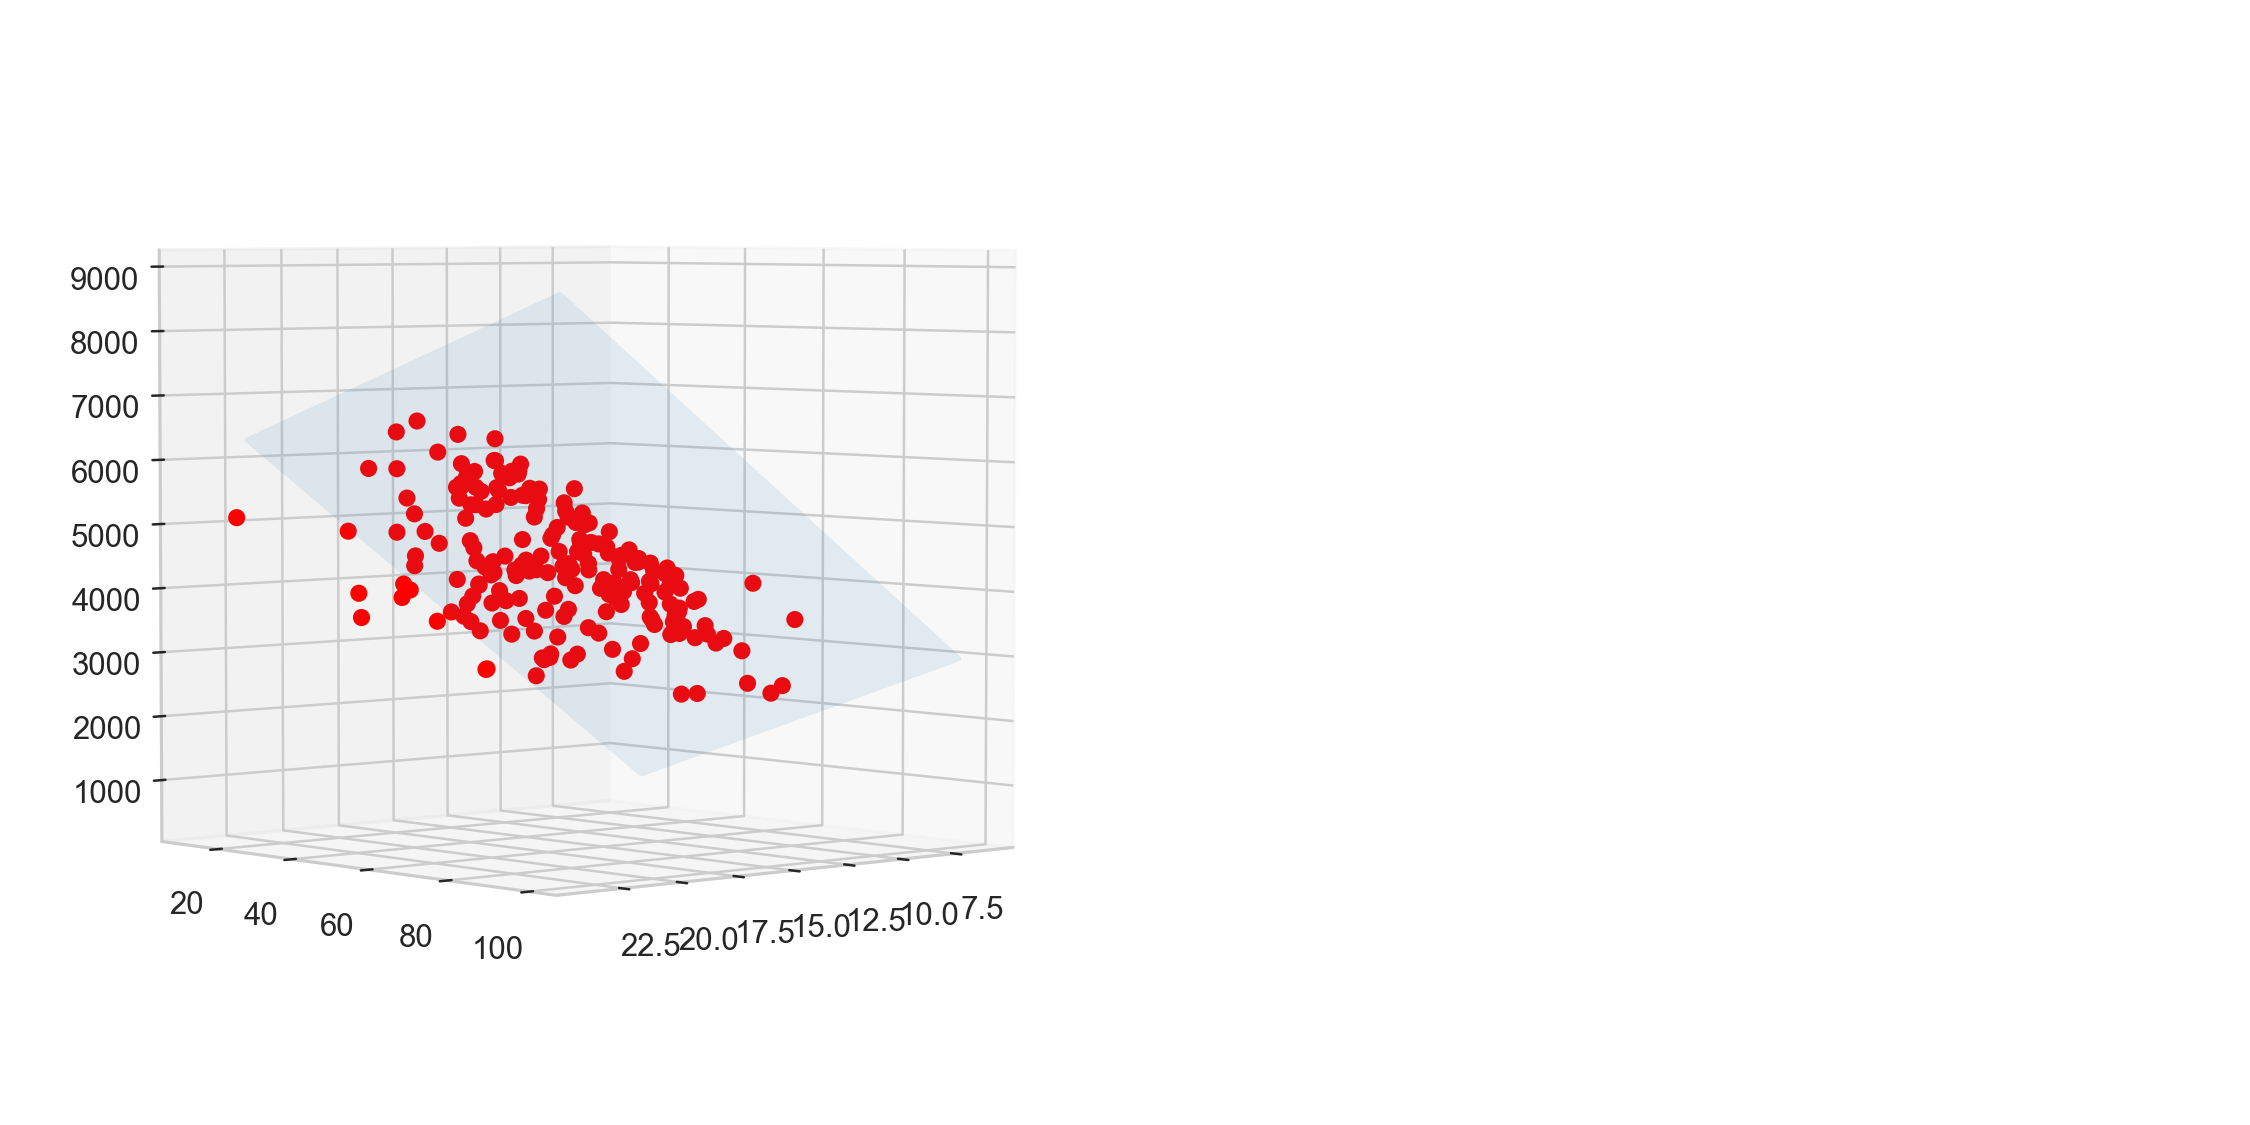

In [9]:
import pandas as pd
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv(file)

features = df[['Por', 'Brittle']].values.reshape(-1,2)
target = df['Prod']

x = features[:, 0]
y = features[:, 1]
z = target

# 3d meshgrid conversion
x_pred = np.linspace(6, 24, 180)
y_pred = np.linspace(20, 100, 180)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
features_new = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# list object to store bootstrap samples
y_boot_lin_rgrss = []

ols = linear_model.LinearRegression()
for i in range(1):
    
    np.random.seed(i)

    # Bootstrapping
    boot_index = np.random.choice(range(0, len(x)), len(x))
    features_boot = features[boot_index]
    target_boot = target[boot_index]

    # Curve fit data
    model = ols.fit(features_boot, target_boot)
    
    # predict
    predicted = model.predict(features_new)
    
    # append result
    y_boot_lin_rgrss.append(predicted)

fig = plt.figure(figsize=(10, 5))

# masking for trimming in 3d plot
#y[y>95]= np.nan
#y[y<75]= np.nan

ax = fig.add_subplot(1, 2, 1, projection='3d')
for rgrss_sample in y_boot_lin_rgrss:
    ax.plot(xx_pred.flatten(), yy_pred.flatten(), rgrss_sample, alpha=0.1)
ax.scatter(x, y, z, color='red', alpha=1)


#ax.set_zlim(1000, 6000)
fig.tight_layout()

ax.view_init(elev=10, azim=141)

In [14]:
%matplotlib notebook

In [95]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=10, azim=ii)
    fig.savefig("temp\gif_image%d.png" % ii)
    


(200, 2)

In [68]:
a = np.linspace(6, 24, 180)
b = np.linspace(0, 100, 180)

In [73]:
features_new = np.array([a, b]).T

array([[  6.        ,   0.        ],
       [  6.10055866,   0.55865922],
       [  6.20111732,   1.11731844],
       [  6.30167598,   1.67597765],
       [  6.40223464,   2.23463687],
       [  6.5027933 ,   2.79329609],
       [  6.60335196,   3.35195531],
       [  6.70391061,   3.91061453],
       [  6.80446927,   4.46927374],
       [  6.90502793,   5.02793296],
       [  7.00558659,   5.58659218],
       [  7.10614525,   6.1452514 ],
       [  7.20670391,   6.70391061],
       [  7.30726257,   7.26256983],
       [  7.40782123,   7.82122905],
       [  7.50837989,   8.37988827],
       [  7.60893855,   8.93854749],
       [  7.70949721,   9.4972067 ],
       [  7.81005587,  10.05586592],
       [  7.91061453,  10.61452514],
       [  8.01117318,  11.17318436],
       [  8.11173184,  11.73184358],
       [  8.2122905 ,  12.29050279],
       [  8.31284916,  12.84916201],
       [  8.41340782,  13.40782123],
       [  8.51396648,  13.96648045],
       [  8.61452514,  14.52513966],
 

In [5]:
%matplotlib notebook